<a href="https://colab.research.google.com/github/mattrusso22-account/Artificial-Neural-Network/blob/master/Copy_of_Module_5_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the libraries
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available()else"cpu")

In [4]:
#download the data
!wget 'https://myweb.shu.edu/bbcswebdav/courses/2020_FALL_DASC8803WA/AlzheimersDataset.zip'

#unzip the compressed file
!unzip 'AlzheimersDataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem219.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

In [5]:
#load the train set data using the ImageFolder function
train_data = ImageFolder('Alzheimer_s Dataset/train', 
                         transform=transforms.Compose([
                                              transforms.Resize(140), #images are of different sizes so lets resize them
                                              transforms.CenterCrop(128), #crop some of the outer regions i.e. the black areas
                                              transforms.Grayscale(), #convert to grayscale
                                              transforms.ToTensor() #convert images to tensor
                                            ]))

['NonDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']

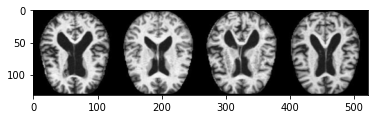

In [6]:
temp_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=0)
#visualize one batch
images_batch, label_batch = next(iter(temp_loader))
grid = utils.make_grid(images_batch)
plt.imshow(grid.numpy().transpose((1,2,0)))
[train_data.classes[x.item()]for x in label_batch]

In [7]:
#Split the train_data into training and validation sets 

#perform an 80/20 split
dataset_size  = len(train_data)
percent_split = 0.8 #80% training and 20% validation
train_size    = int(dataset_size * percent_split)
val_size      = dataset_size - train_size

train_set, val_set = torch.utils.data.random_split(train_data, [train_size, val_size]) #split the data based on the sizes

#create the training set loader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,
                        shuffle=True, num_workers=0)

#create the validation set loader
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64,
                        shuffle=True, num_workers=0)

In [8]:
#load the train set data using the ImageFolder function
test_data = ImageFolder('Alzheimer_s Dataset/test', 
                         transform=transforms.Compose([
                                              transforms.Resize(140), #images are of different sizes so lets resize them
                                              transforms.CenterCrop(128), #crop some of the outer regions i.e. the black areas
                                              transforms.Grayscale(), #convert to grayscale
                                              transforms.ToTensor() #convert images to tensor
                                            ]))

In [9]:
test_data = torch.utils.data.DataLoader(test_data, batch_size=64,
                        shuffle=True, num_workers=0)

In [10]:
class ConvNet(nn.Module):
 def __init__(self):
    super(ConvNet, self).__init__()
    #initialize the convolutional layers
    #TODO: add the in_channels and out_channels
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
    self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
    nn.Dropout(p=0.5)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=22, kernel_size=3, stride=1, padding=1)
    
    #TODO: initialize the fully connected layers -- you can add more layers if necessary
    self.fc1 = nn.Linear(in_features=22 *32 * 32, out_features=10000) #add the input and out
    self.fc2 = nn.Linear(in_features=10000, out_features=750)
    self.fc3 = nn.Linear(in_features=750, out_features=4)

def forward(self, _x):
      _x = self.pool(F.relu(self.conv1(_x)))
      _x = self.pool(F.relu(self.conv2(_x)))
      _x = self.pool(F.relu(self.conv3(_x)))
      #TODO: update the forward pass for the third conv layer
        
      _x = _x.view(-1, 22 * 32 * 32)
      _x = F.relu(self.fc1(_x))
      _x = F.relu(self.fc2(_x))
      _x = self.fc3(_x)
      return _x

In [11]:
EPOCHS = 10

cnn_model = ConvNet()
cnn_model = cnn_model.to(device)

#TODO: define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=3e-4)

In [12]:
  training_loss = []
  validation_loss = []
  validation_accuracy = []

#start training
  for epoch in range(EPOCHS):
    cnn_model.train()
    batch_loss = []

    #Training the CNN
    for idx, (image_batch, label_batch) in enumerate(train_loader):

      image_batch = image_batch.to(device)
      label_batch = label_batch.to(device)

      #forward pass
      pred_labels = cnn_model(image_batch)

      #calculate the loss (diff between predictions and the actual labels)
      loss = loss_function(pred_labels, label_batch)

      #backward pass
      loss.backward()
      optimizer.step() #update the parameters' weights using the gradients and learning rate

      #clear gradients
      optimizer.zero_grad()

      cnn_model.eval
      val_loss, val_accuracy = evaluate.model(val_loader, cnn_model, loss_function)

      validation_loss.apend(val_loss)
      validation_accuracy.append(val_accuracy)

    #print the loss
    #show epoch and avg loss
    training_loss.append(sum(batch_loss)/len(batch_loss))
    print('training_loss:{:.6f}'.format(training_loss[-1]))

    

NotImplementedError: ignored